<a href="https://colab.research.google.com/github/JeroenVanB/FruitClassification/blob/main/classify_fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fruit classification
## Refrences:
- https://www.tensorflow.org/tutorials/load_data/images
- https://www.tensorflow.org/tutorials/images/classification
- https://www.tensorflow.org/tutorials/images/transfer_learning
- https://www.kaggle.com/moltean/fruits


###Initialization Variables


In [ ]:
architecture = 1 # where:
  # 1 = MobileNetV2
  # 2 = InceptionV3
  # 3 = ResNet50
  # 4 = VGG19


###Preprocessing


In [20]:
USING_COLAB = True
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import pathlib

In [22]:
if USING_COLAB:
  from google.colab import drive
  drive.mount("/content/gdrive")
  !unzip '/content/gdrive/My Drive/Deep Learning/Dataset.zip'

data_dir = 'Dataset/'


Streaminguitvoer ingekort tot de laatste 5000 regels.
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._244_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/r2_210_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._r2_210_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/254_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._254_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/r2_200_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._r2_200_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/r_225_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._r_225_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/r2_192_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._r2_192_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/r2_182_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._r2_182_100.jpg  
  inflating: Dataset/Train/Pears/Pear 2/r2_34_100.jpg  
  inflating: __MACOSX/Dataset/Train/Pears/Pear 2/._r2_34_100.jpg  
  inflating: Dat

In [23]:
train_dir = pathlib.Path(data_dir + 'Train')
BATCH_SIZE = 32
IMG_SIZE = (100,100)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    pathlib.Path(data_dir + 'Test'),
    shuffle=True,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)
num_of_classes = len(class_names)


Found 33940 files belonging to 11 classes.
Using 27152 files for training.
Found 33940 files belonging to 11 classes.
Using 6788 files for validation.
Found 11357 files belonging to 11 classes.
['Apples', 'Bananas', 'Cherries', 'Grapes', 'Onions', 'Peaches', 'Pears', 'Peppers', 'Plums', 'Potatoes', 'Tomatoes']


###Visualize data

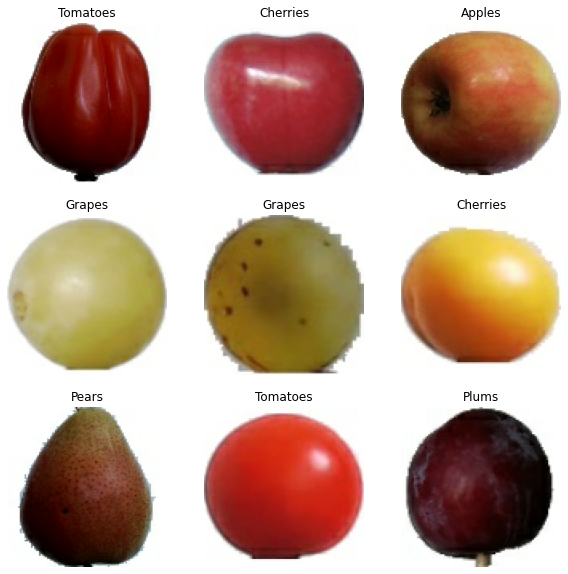

In [24]:
def plot_images():
    plt.figure(figsize=(10, 10))
    for images, labels in train_ds.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")
plot_images()

###Data performance/caching and augmentation

In [25]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

(32, 100, 100, 3)
(32,)


In [27]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

### Simple Conv Net

In [28]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [29]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
849/849 [==============================] - 26s 23ms/step - loss: 0.6930 - accuracy: 0.7765 - val_loss: 0.0137 - val_accuracy: 0.9966
Epoch 2/3
849/849 [==============================] - 7s 9ms/step - loss: 0.0170 - accuracy: 0.9948 - val_loss: 0.1233 - val_accuracy: 0.9641
Epoch 3/3
849/849 [==============================] - 7s 8ms/step - loss: 0.0278 - accuracy: 0.9901 - val_loss: 0.0491 - val_accuracy: 0.9807


In [30]:
model.evaluate(test_ds)

355/355 [==============================] - 6s 16ms/step - loss: 0.2078 - accuracy: 0.9430


[0.2078174501657486, 0.9430307149887085]

### Setup and training

In [42]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

IMG_SHAPE = IMG_SIZE + (3,)

if architecture == 1: # MobileNetV2
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                                include_top=False,
                                                weights='imagenet')
elif architecture == 2: # Inception V3
  base_model = tf.keras.applications.InceptionV3(
    include_top=False, weights='imagenet',input_shape=IMG_SHAPE
)
elif architecture == 3: # ResNet50
  pass
elif architecture == 4: # VGG19
  pass

# This feature extractor will convert each 100x100x3 image into a 5x5x1280 block of features
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = tf.keras.layers.Dense(num_of_classes,)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

87916544/87910968 [==============================] - 0s 0us/step
(32, 1, 1, 2048)
(32, 2048)
(32, 11)


####Important note about BatchNormalization layers
[TF Source.](https://www.tensorflow.org/tutorials/images/transfer_learning#important_note_about_batchnormalization_layers)
Many models contain tf.keras.layers.BatchNormalization layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial.

When you set layer.trainable = False, the BatchNormalization layer will run in inference mode, and will not update its mean and variance statistics.

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing training = False when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

In [43]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
  optimizer=tf.keras.optimizers.Adam(lr=0.0001),
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 100, 100, 3)       0         
_________________________________________________________________
tf.math.truediv_2 (TFOpLambd (None, 100, 100, 3)       0         
_________________________________________________________________
tf.math.subtract_2 (TFOpLamb (None, 100, 100, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0   

In [44]:
initial_epochs = 10

# Evaluation before training (val_ds)
loss0, accuracy0 = model.evaluate(val_ds)
print("initial loss (on val_ds): {:.2f}".format(loss0))
print("initial accuracy (on val_ds): {:.2f}".format(accuracy0))

# Training the model
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

# Evaluation after training (val_ds)
loss1, accuracy1 = model.evaluate(val_ds)
print("after training loss (on val_ds): {:.2f}".format(loss1))
print("after training accuracy (on val_ds): {:.2f}".format(accuracy1))

213/213 [==============================] - 6s 18ms/step - loss: 3.6489 - accuracy: 0.2025
initial loss (on val_ds): 3.61
initial accuracy (on val_ds): 0.20
Epoch 1/10
849/849 [==============================] - 23s 23ms/step - loss: 1.3872 - accuracy: 0.5374 - val_loss: 0.6677 - val_accuracy: 0.7917
Epoch 2/10
849/849 [==============================] - 19s 23ms/step - loss: 0.7049 - accuracy: 0.7622 - val_loss: 0.4819 - val_accuracy: 0.8543
Epoch 3/10
849/849 [==============================] - 20s 23ms/step - loss: 0.5551 - accuracy: 0.8113 - val_loss: 0.4029 - val_accuracy: 0.8810
Epoch 4/10
849/849 [==============================] - 20s 23ms/step - loss: 0.4824 - accuracy: 0.8357 - val_loss: 0.3559 - val_accuracy: 0.8979
Epoch 5/10
849/849 [==============================] - 20s 23ms/step - loss: 0.4286 - accuracy: 0.8557 - val_loss: 0.3213 - val_accuracy: 0.9047
Epoch 6/10
849/849 [==============================] - 20s 23ms/step - loss: 0.3939 - accuracy: 0.8666 - val_loss: 0.2958 - v

#### Learning curves plot

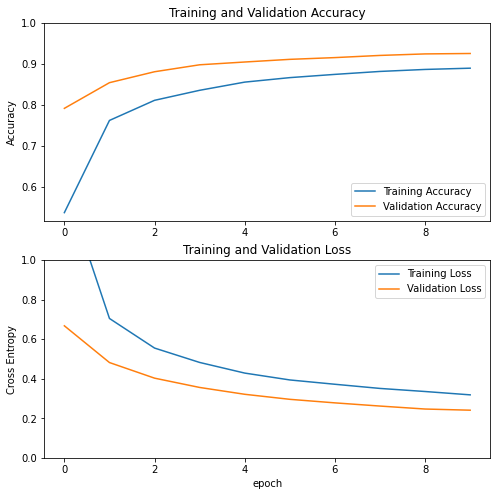

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

#### Important note about difference in validation metrics
If you are wondering why the validation metrics are clearly better than the training metrics, the main factor is because layers like tf.keras.layers.BatchNormalization and tf.keras.layers.Dropout affect accuracy during training. They are turned off when calculating validation loss.

To a lesser extent, it is also because training metrics report the average for an epoch, while validation metrics are evaluated after the epoch, so validation metrics see a model that has trained slightly longer.

[ 2  3  6  9 10  8  3  7  2  1  0  7  5  6  9  6  1  6  0 10  0  6 10  6
  0  6  0  8  0  6 10  7]


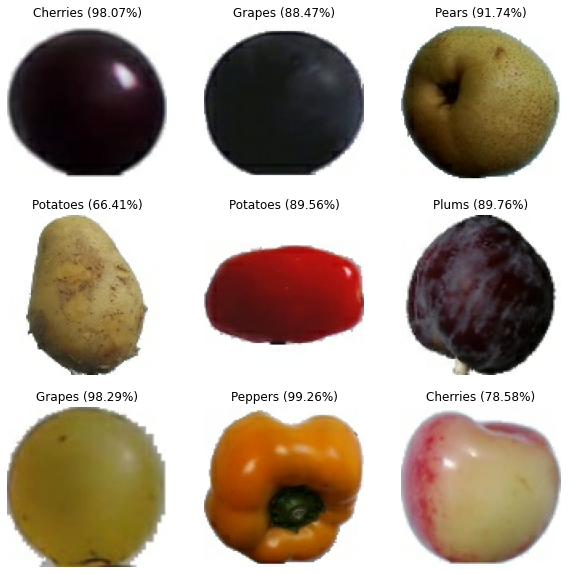

In [46]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
print(label_batch)
predictions = model.predict_on_batch(image_batch)
score = tf.nn.softmax(predictions[0])

# print(label_batch[0])
# print(score)

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

plt.figure(figsize=(10, 10))
for i in range(9):
  score = tf.nn.softmax(predictions[i])
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[np.argmax(score)] + ' ({:.2f}%)'.format(100 * np.max(score)))
  plt.axis("off")

